In [19]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

In [20]:
import csv
df = pd.read_csv('Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

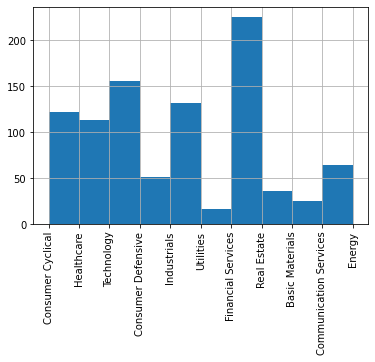

In [21]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [22]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [23]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [24]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [25]:
len(rows)

476

In [26]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


In [27]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               93
Technology                89
Consumer Cyclical         79
Financial Services        68
Healthcare                52
Communication Services    29
Basic Materials           20
Consumer Defensive        19
Energy                    15
Real Estate               11
Utilities                  1
Name: sector, dtype: int64

In [28]:
#df for each sector

df_basic_materials = df.loc[df['sector'] == 'Basic Materials']
df_communication = df.loc[df['sector'] == 'Communication Services']
df_consumer_c = df.loc[df['sector'] == 'Consumer Cyclical']
df_consumer_d = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_financial = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_real_estate = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilites = df.loc[df['sector'] == 'Utilities']

In [29]:
#sectors used in income model: utilities, real estate, financial, consumer defensive, industrials

In [30]:
#combining the sectors into 1 dataframe

df2 = pd.concat([df_utilites, df_real_estate, df_financial, df_consumer_d, df_industrials])
df2
#returns 192 stocks

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,0.61,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.005,0.052115,1.890183e+10,...,1.16,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,1.40,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,0.36,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,0.31,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.090,0.030170,4.869738e+08,...,1.48,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257
908,USAK,"USA Truck, Inc.",Industrials,Increase,Below Fair Price,UnderValued,No Data,24.040,0.108008,2.136505e+08,...,2.09,2.057,0.2760,9.246155,11.686924,30.639383,999.00,0.273259,0.638308,0.234642
918,VRRM,Verra Mobility Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,17.270,0.056159,2.695225e+09,...,1.46,0.058,0.3080,18.178947,297.758640,27.507524,999.00,0.196676,NaN,NaN
920,VSEC,VSE Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,47.330,0.148449,6.016543e+08,...,1.48,0.633,0.1960,12.198454,74.770935,33.682675,999.00,0.199108,0.472182,0.061138


## Filtering Stocks based on Sharpe Ratio

In [31]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [32]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [33]:
sharpe_list = []
for i in range(len(df2)):
    each = df2.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [34]:
sharpe_list

[0.484,
 0.167,
 0.669,
 0.576,
 0.825,
 0.347,
 0.818,
 0.372,
 0.445,
 -0.054,
 0.162,
 0.772,
 0.669,
 0.039,
 0.256,
 0.447,
 0.134,
 0.296,
 0.469,
 0.355,
 0.347,
 0.298,
 0.504,
 0.566,
 0.29,
 0.388,
 0.684,
 0.187,
 0.033,
 0.099,
 0.233,
 0.345,
 0.104,
 0.064,
 0.844,
 -0.053,
 0.636,
 0.274,
 0.452,
 0.059,
 0.408,
 0.182,
 0.338,
 0.33,
 0.773,
 -0.027,
 -0.473,
 0.964,
 0.018,
 0.173,
 0.164,
 0.342,
 0.305,
 0.091,
 0.266,
 0.598,
 0.177,
 0.487,
 0.034,
 0.227,
 0.251,
 -0.11,
 0.297,
 0.99,
 0.398,
 0.392,
 0.309,
 0.491,
 0.237,
 0.532,
 0.935,
 0.248,
 0.357,
 1.039,
 0.391,
 0.757,
 0.315,
 0.223,
 0.297,
 0.311,
 0.021,
 0.133,
 0.036,
 -0.354,
 0.44,
 0.37,
 1.074,
 0.209,
 0.302,
 0.063,
 0.121,
 0.309,
 0.3,
 0.041,
 0.763,
 0.31,
 0.198,
 0.093,
 0.258,
 -0.018,
 0.43,
 0.776,
 0.735,
 0.367,
 0.396,
 0.491,
 0.234,
 0.32,
 0.619,
 0.34,
 0.749,
 0.742,
 0.481,
 0.716,
 -0.024,
 1.252,
 0.523,
 0.402,
 0.324,
 0.667,
 0.522,
 0.187,
 0.264,
 0.219,
 0.734,
 0.0

In [35]:
df2["sharpe"] = sharpe_list
df2

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.484
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.005,0.052115,1.890183e+10,...,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426,0.167
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.669
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.576
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.090,0.030170,4.869738e+08,...,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257,0.475
908,USAK,"USA Truck, Inc.",Industrials,Increase,Below Fair Price,UnderValued,No Data,24.040,0.108008,2.136505e+08,...,2.057,0.2760,9.246155,11.686924,30.639383,999.00,0.273259,0.638308,0.234642,0.650
918,VRRM,Verra Mobility Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,17.270,0.056159,2.695225e+09,...,0.058,0.3080,18.178947,297.758640,27.507524,999.00,0.196676,NaN,NaN,0.396
920,VSEC,VSE Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,47.330,0.148449,6.016543e+08,...,0.633,0.1960,12.198454,74.770935,33.682675,999.00,0.199108,0.472182,0.061138,0.302


In [36]:
df3 = df2[df2["sharpe"] > 0.3]
df3

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.484
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.669
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.576
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.825
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.580,0.133822,1.705837e+09,...,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533,0.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.090,0.030170,4.869738e+08,...,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257,0.475
908,USAK,"USA Truck, Inc.",Industrials,Increase,Below Fair Price,UnderValued,No Data,24.040,0.108008,2.136505e+08,...,2.057,0.2760,9.246155,11.686924,30.639383,999.00,0.273259,0.638308,0.234642,0.650
918,VRRM,Verra Mobility Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,17.270,0.056159,2.695225e+09,...,0.058,0.3080,18.178947,297.758640,27.507524,999.00,0.196676,NaN,NaN,0.396
920,VSEC,VSE Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,47.330,0.148449,6.016543e+08,...,0.633,0.1960,12.198454,74.770935,33.682675,999.00,0.199108,0.472182,0.061138,0.302


## Correlation between Stocks

In [37]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

In [ ]:
returns_list = []
for i in range(len(df3)):
    each = df3.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [ ]:
returns_list

In [ ]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

In [ ]:
return_series_close.plot(figsize=(16,9))

In [ ]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [ ]:
highest.dropna(axis=1, how="all")

In [ ]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [ ]:
correlation = correlation[correlation < 0.4]
correlation

## Final DF

In [54]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [55]:
indexes = []
for i in range(len(df3)):
    each = df3.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [56]:
chosen_df = df3.iloc[indexes]
chosen_df # stocks for the income model

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
310,CDMO,"Avid Bioservices, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,19.6450,0.146303,1.209769e+09,...,0.136,0.1500,61.390630,144.448530,9.822500e+00,999.00,0.298786,0.688251,0.654617,0.839
351,CRSP,CRISPR Therapeutics AG,Healthcare,Increase,Above Fair Price,UnderValued,No Data,55.6600,0.147264,4.259493e+09,...,5.263,-2.0040,-7.906250,10.575717,-8.200419e+00,999.00,0.272043,0.649606,0.295733,0.688
355,CSBR,"Champions Oncology, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,7.8900,-0.013077,1.066326e+08,...,0.020,0.1500,34.304348,394.500000,3.945000e+00,999.00,0.141975,0.686045,0.120134,0.603
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.2500,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,2.414215e+02,999.00,0.124956,0.296964,0.223068,0.843
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.0300,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,6.580331e+01,999.00,0.179658,0.498130,0.345048,0.968
651,MODV,ModivCare Inc.,Healthcare,Increase,Below Fair Price,OverValued,No Data,101.5100,0.209990,1.421120e+09,...,1.594,0.6845,13.552737,63.682560,1.575569e+03,999.00,0.090920,0.383729,0.202971,0.644
711,OPCH,"Option Care Health, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,23.1900,-0.012280,4.171302e+09,...,0.451,0.1000,25.766668,51.419070,7.771849e+00,999.00,0.245300,0.604863,0.286065,0.729
715,OPRX,OptimizeRx Corporation,Healthcare,Increase,Below Fair Price,OverValued,No Data,41.6500,0.330272,7.400997e+08,...,0.067,0.5000,49.000000,621.641800,2.275756e+02,999.00,0.088489,0.679004,0.808683,1.141
778,RGEN,Repligen Corporation,Healthcare,Increase,Below Fair Price,OverValued,No Data,181.4600,0.455590,1.003265e+10,...,2.101,0.2850,57.974440,86.368390,2.463760e+02,999.00,0.117663,0.415307,0.448328,0.963
882,TNDM,"Tandem Diabetes Care, Inc.",Healthcare,Increase,Below Fair Price,UnderValued,No Data,105.2100,-0.058674,6.684275e+09,...,0.339,5.9000,140.280000,310.354000,5.301372e+08,999.00,0.065392,0.791402,0.353611,0.877


In [57]:
chosen_df.to_csv("selected_stocks_income.csv")

## EDA

In [58]:
chosen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 310 to 792
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticker                50 non-null     object 
 1   name                  50 non-null     object 
 2   sector                50 non-null     object 
 3   Earnings_expectation  50 non-null     object 
 4   irv_status            50 non-null     object 
 5   capm_status           50 non-null     object 
 6   esg_status            50 non-null     object 
 7   current_price         50 non-null     float64
 8   annu_return_10y       50 non-null     float64
 9   market_cap            50 non-null     float64
 10  marketcap_cat         50 non-null     object 
 11  beta                  50 non-null     float64
 12  eps_ttm               50 non-null     float64
 13  growth_estimate_5y    50 non-null     float64
 14  pe_forward            50 non-null     float64
 15  pe_trailing           

In [59]:
chosen_df.describe()

,current_price,annu_return_10y,market_cap,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
count,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000
mean,126.150132,0.152867,2.764458e+10,1.273600,3.961600,0.469392,24.520303,91.758611,1.069736e+07,783.761200,0.174018,0.490122,0.294523,0.782580
std,140.445604,0.136322,1.143182e+11,0.543153,3.981206,1.041244,30.113050,180.292147,7.496032e+07,409.410601,0.066025,0.163346,0.140107,0.160257
min,7.120000,-0.182789,7.973087e+07,0.310000,0.020000,-2.004000,-90.260870,7.128537,-8.200419e+00,6.990000,0.056883,0.267604,0.120134,0.603000
25%,32.910000,0.105175,9.907033e+08,0.855000,0.615500,0.133700,12.916799,18.956910,1.838113e+01,999.000000,0.123133,0.356788,0.194006,0.661000
50%,86.310000,0.151416,4.119305e+09,1.235000,3.129000,0.231150,19.237789,31.693050,6.677441e+01,999.000000,0.169326,0.462529,0.269330,0.734500
75%,157.735000,0.205490,1.733952e+10,1.710000,5.154750,0.369250,27.791628,56.625257,3.822444e+02,999.000000,0.227066,0.610486,0.352193,0.842000
max,806.050000,0.609586,8.094838e+11,2.500000,17.495000,5.900000,140.280000,1056.821400,5.301372e+08,999.000000,0.323098,0.931402,0.808683,1.252000
